# DTLZ2 Benchmark
## Imports

In [1]:
import json
import os
import pathlib
import sys
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt


#pypath = os.path.join(str(pathlib.Path.cwd().parent.parent),"app","lib")

#sys.path.append(pypath)

from everest.study import PoolStudy
from everest.benchmarks.multiobjective import DTLZ2 as DTLZ2_
from everest.strategies.strategy import RandomStrategy
from everest.strategies.botorch.sobo import BoTorchSoboStrategy
from everest.strategies.botorch.qehvi import BoTorchQnehviStrategy, BoTorchQehviStrategy
from everest.strategies.botorch.qparego import BoTorchQparegoStrategy
from everest.domain.features import InputFeature

from everest.benchmarks.visualization import plot_optimization_history, plot_pooloptimization_history
from everest.api import datascience

__init__.py run


## Run strategies

In [2]:
num_optimizations = 1
num_iterations = 50
batch_size = 1

### Random Strategy

In [3]:
random_studies = []
for i in range(num_optimizations):
    study = DTLZ2_(dim=6)
    study.optimize(RandomStrategy(use_sobol=False), batch_size=batch_size, num_iterations=num_iterations)
    random_studies.append(study)

100%|██████████| 50/50 [00:03<00:00, 13.85it/s, fbest=0.0984]


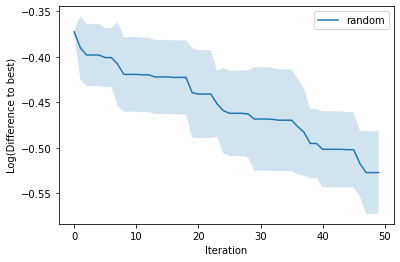

In [5]:
#ax = plot_optimization_history(bo_studies,error_bar=True, log_scale=True, label = "qEI")
ax = plot_optimization_history(random_studies,error_bar=True, log_scale=True, label = "random", best_possible_f=random_studies[0].best_possible_hypervolume,)
ax.legend()
plt.show()

### QPAREGO

In [3]:
bo_studies2 = []

for i in range(num_optimizations):
    study = DTLZ2_(dim=6)
    #study.optimize(BoTorchQnehviStrategy(ref_point=study.ref_point,categorical_encoding="ONE_HOT",categorical_method="EXHAUSTIVE"),num_iterations=50)
    study.optimize(BoTorchQparegoStrategy(categorical_encoding="ONE_HOT",categorical_method="EXHAUSTIVE"),num_iterations=50)
    bo_studies2.append(study)

100%|██████████| 50/50 [17:10<00:00, 20.61s/it, fbest=0.219] 


### QNEHVI

In [4]:
bo_studies = []

for i in range(num_optimizations):
    study = DTLZ2_(dim=6)
    #study.optimize(BoTorchQnehviStrategy(ref_point=study.ref_point,categorical_encoding="ONE_HOT",categorical_method="EXHAUSTIVE"),num_iterations=50)
    study.optimize(BoTorchQehviStrategy(ref_point=study.ref_point,categorical_encoding="ONE_HOT",categorical_method="EXHAUSTIVE"),num_iterations=50)
    bo_studies.append(study)

100%|██████████| 50/50 [07:45<00:00,  9.31s/it, fbest=0.37] 


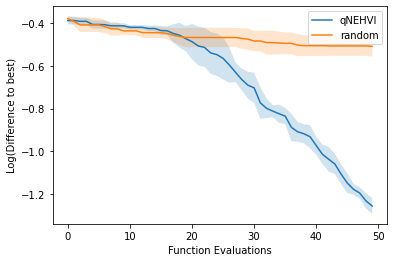

In [13]:
ax = plot_optimization_history(bo_studies,error_bar=True, log_scale=True, label = "qNEHVI", best_possible_f=random_studies[0].best_possible_hypervolume)
ax = plot_optimization_history(random_studies,error_bar=True, log_scale=True, label = "random", best_possible_f=random_studies[0].best_possible_hypervolume,ax=ax)
ax.legend()
plt.show()

In [18]:
benchmark = DTLZ2_(dim=6)
random_strategy = RandomStrategy.from_domain(benchmark.domain)
experiments = benchmark.run_candidate_experiments(random_strategy.ask(candidate_count=1000)[0])

studies = []
for i in range(2):
    pool = PoolStudy(domain=benchmark.domain,num_starting_experiments=10,experiments=experiments,metrics="HYPERVOLUME", ref_point=benchmark.ref_point)
    my_strategy = BoTorchQehviStrategy(ref_point=benchmark.ref_point,categorical_encoding="ONE_HOT",categorical_method="EXHAUSTIVE")
    pool.optimize(my_strategy,num_iterations=50)
    studies.append(pool)

100%|██████████| 50/50 [09:26<00:00, 11.33s/it, dist2best=0.0217]


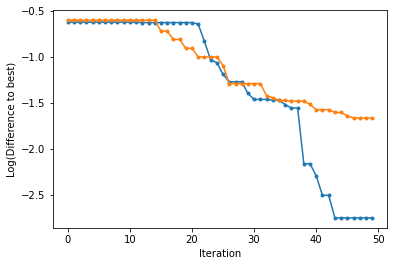

In [19]:
plot_pooloptimization_history(studies, error_bar=False, log_scale=True)
plt.show()

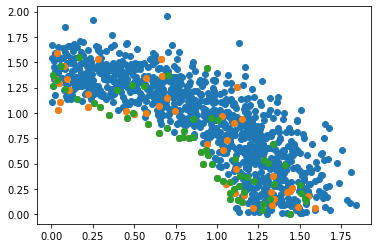

In [25]:
fig, ax = plt.subplots()
ax.scatter(pool.experiments.f_0,pool.experiments.f_1)
ax.scatter(studies[0].picked_experiments.f_0,studies[0].picked_experiments.f_1)
ax.scatter(studies[1].picked_experiments.f_0,studies[1].picked_experiments.f_1)
plt.show()